# 01. Pytorch Workflow

- [Course Video](https://youtu.be/V_xro1bcAuA)
- [Resource Notebook](https://www.learnpytorch.io/01_pytorch_workflow)
- [GitHub Discussions](https://github.com/mrdbourke/pytorch-deep-learning)

## What we will be covering

1. Data (prepare and load).
2. Build a ML / DL model.
3. Fitting / training model to dat.
4. Making predictions.
5. Saving and loading a model.
6. Putting it all together.

In [169]:
# Import Libraries
import torch
from torch import nn # nn contains all PyTorch's Building Blocks for neural networks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Check PyTorch Version
torch.__version__

'2.2.1+cu121'

# Preparing & Loading Data

Data can be almost anything in machine learning.
  - Excel Spreadsheet
  - Images
  - Videos
  - Audio
  - DNA
  - Text

Machine Learning is a game of two parts.
  1. Get data into a numerical representation
  2. Build a model to learn patterns in that numerican representation.

To showcase this, lets create some *known* data using the linear regression formula.



## Linear Regression Formula

**Y = a + BX**

A linear Regression has an equation of the form shown above, Where `X` is the explanatory variable and `Y` is the dependent variable. The slope of the line is `b` and `a` is the intercept.

We'll use a linear regression formula to make a straight line with *known parameters*.

In [170]:
# Create known parameters
weight = 0.7 # b in linear regression formula
bias = 0.3 # a in linear regression formula

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias # applying the linear regression formula

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [171]:
len(X), len(y)

(50, 50)

## Splitting Data into training and test sets

This is one of the most important concepts in Machine Learning in general.

There are three major datasets in machine learning -
1. Training Set - where the model learns patterns from.
2. Validation Set - where the model is tuned.
3. Test Set - The model gets evaluated on this data to test what it has learned.

Now let's create a training and test set with the data we created above.

In [172]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

- Now, we've got 40 samples for training, and 10 samples for testing.
- The model we create will try to learn the relationship between `X_train` and `y_train` and then we wwill evaluate what it learns on `X_test` and `y_test`.

## Visualizing the Data

But righ now the data is just numbers on a page, we can understand our data more by visualizing it by plotting it using `matplotlib`

In [173]:
# Writing Function to plot graphs
def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None,
    title=None
):
  plt.figure(figsize=(10, 7))

  # plot training data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # plot testing data
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  # are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", label="Predictions")

  if title is not None:
    plt.title(label=title)

  # Show the legend
  plt.legend(prop={"size": 12});

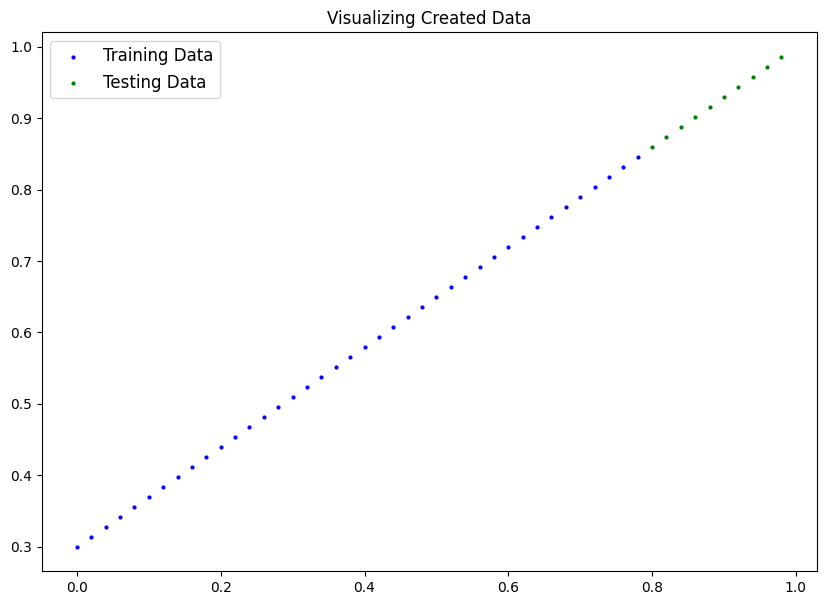

In [174]:
plot_predictions(title="Visualizing Created Data");

- We will train our model on the blue dots, and then expect the model to predict the green dots (sort of).

# Building our first PyTorch Model

We're gonna create a linear regression model.

What our model does:
- Start with random values (weight and bias).
- Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (the weights and biases we used to create the data).

How does it do that?

Through two main algorithms:
1. [Gradient Descent](https://youtu.be/IHZwWFHWa-w?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)
2. [Backpropogation](https://youtu.be/Ilg3gGewQ5U?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)

In [175]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.randn(
        1,
        requires_grad=True,
        dtype = torch.float
    ))

    self.bias = nn.Parameter(torch.randn(
        1,
        requires_grad = True,
        dtype = torch.float
    ))

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias # linear regression formula

## PyTorch Model Building Essentials

- `torch.nn` - contains all of the building blocks for computational graphs (neural netwokrs).
- `torch.nn.Parameters` - what parameters should our model try and learn, often, a PyTorch layer from torch.nn will set these for us.
- `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite `forward()`.
- `torch.optim` - this is where the optimizers in PyTorch live, they help with gradient descent.
- `def forward()` - All `nn.Module` subclasses require you to overwrite `forward()`. This method defines what happens in the forward computation.

## Checking the contents of our PyTorch Model

Now that we've created a model, lets see whats *inside* our model.

We can check out our model's parameters, using `.parameters()`

In [176]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel() # trained model
model_1 = LinearRegressionModel() # untrained model

# Check out the paramaters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [177]:
# List name parameters
model_1.state_dict()

OrderedDict([('weight', tensor([0.2345])), ('bias', tensor([0.2303]))])

# Trying to make predictions with our model (without training)

using `torch.inference_mode()`


- To check our model's predictive power, lets see how well it predicts `y_test` based on `x_test`.
- When we pass data  through our model, its going to run it thorugh the `forward()` method.

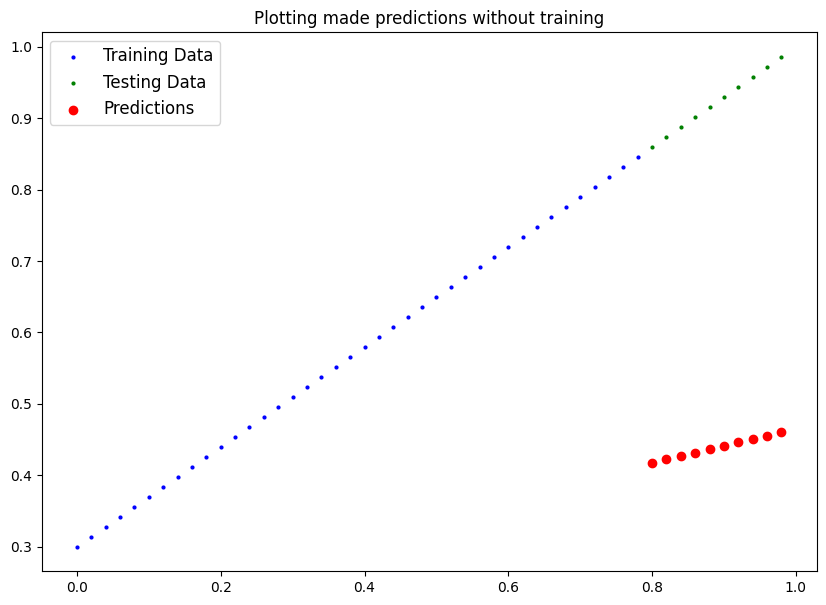

In [178]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_1(X_test)
plot_predictions(predictions=y_preds, title="Plotting made predictions without training")

- As we can see above, the predictions arent exactly accurante, next, we will train the model for better predictions.

# Training our model

- The whole idea of training is for a model to move from some unknown parameters (these may be random) to some *known* parameters.
- Or in other words, from poor representation to better representation of the data.
- One way to measure how poor or how wrong the models' predictions are, is to use a loss function.
- Note - Loss functions may also be called cost functions or criterion in different areas, for our case lets refer to it as a loss function.

Things we need to train:

- **Loss Function** - A function to measure how wrong a model's predictions are to the ideal outputs. (Lower is better).
- **Optimizer** - Take into account the loss of a model and adjusts the model's parameters (eg. weights and biases) to imporve the loss function.

And Specifically for PyTorch, we need:

- A Training Loop
- A Testing Loop

## Setting up a loss function and organizer.



In [179]:
# Setup a loss function
loss_fn = nn.L1Loss() # mean absolute error function

# Setup an optimizer
optimizer = torch.optim.SGD( # stochastic gradient descent
    params = model_0.parameters(),
    lr=0.01 # learning rate
)

- Learning rate is possibly the most important hyperparameter we can set.
- The higher the learning rate, the more it adjusts the parameters in each hit.

## Building a training loop

In a training loop, we loop through the data performing the following steps:
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called a forward propogation.
2. Calculate the loss - compare forward pass predictions to ground truth labels.
3. Optimizer zero grad - zero the optimizer gradients, as they accumulate every epoch so we to start fresh each forward  pass.
4. Loss backward - move backwards through the neural network to calculate the gradients of each of the parameters of our model with respect to the loss. (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss. (**gradient descent**)

In [180]:
torch.manual_seed(42)

# An epoch is one loop through the data...
epochs = 300

epoch_count = []
loss_values = []
test_loss_values = []

# Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: ", loss)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropogation on the loss with respect to the parameters of the model.
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode(): # turns off gradient tracking and a couple more things.
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print whats happening
  if epoch % 100 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(f"Model State: {model_0.state_dict()}")


Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
Model State: OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 100 | Loss: 0.024458957836031914 | Test Loss: 0.05646304413676262
Model State: OrderedDict([('weight', tensor([0.5800])), ('bias', tensor([0.3503]))])
Epoch: 200 | Loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
Model State: OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])


- An `epoch` is a hyperparameter, bacause we've set it ourselves.
- The `train mode` in PyTorch sets all the parameters hat require gradients to require gradients.
- The `eval mode` in PyTorch turns off gradient tracking and the different settings in the model not needed for evaluation / testing.
- `optimizer.step()` steps the optimizer to update the model's parameters with respect to the gradients calculated by `loss.backward()`.

In [181]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

- As visible, the loss is going down and the weight and bias is getting closer to the ones we set before.

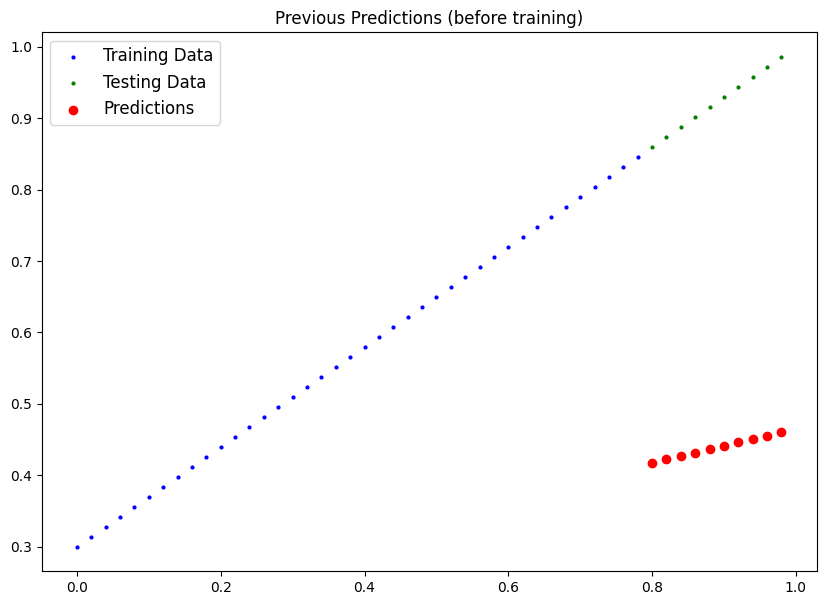

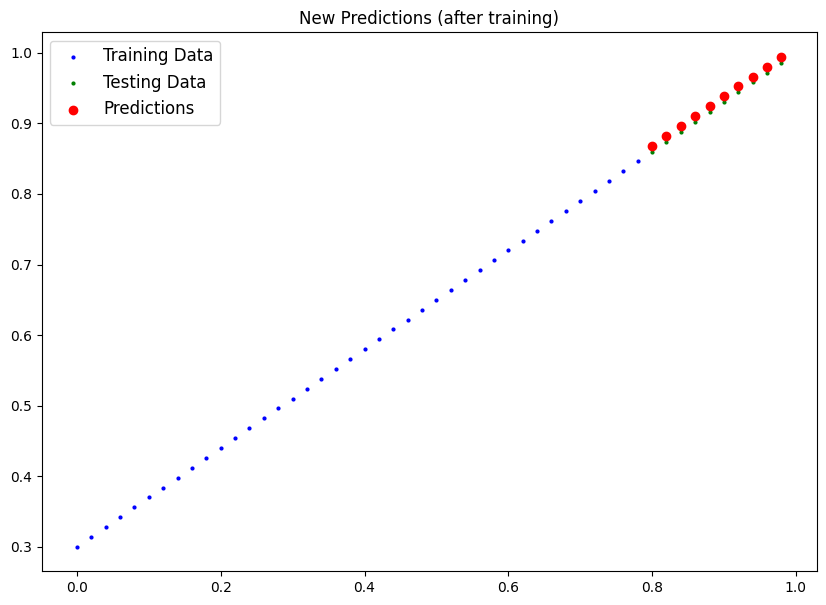

In [182]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds, title="Previous Predictions (before training)")
plot_predictions(predictions=y_preds_new, title="New Predictions (after training)")

- As visible above, after training the model for 10000 epochs, the predictions are quite accurate and the loss is low. The red dots are overlapping the green dots in this case.

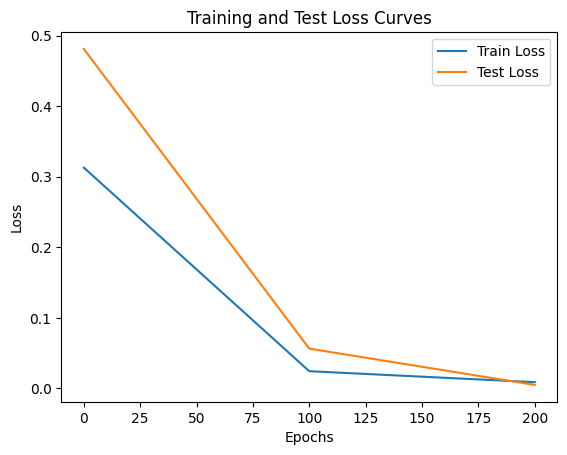

In [183]:
# Plotting the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

# Saving and Loading a model

There are three main methods for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save PyTorch object in Python's pickle format.
2. `torch.load()` - allows you to load a saved PyTorch Model.
3. `torch.nn.Module.load_state_dict()` - allows to load a model's saved state dictionary.

## Saving Model

Steps carried out:
1. Create `models` directory.
2. Create `MODEL_SAVE_PATH`.
3. Save the model's `state_dict()`.


In [184]:
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(
  parents = True,
  exist_ok = True
)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model's state_dict
torch.save(
  obj = model_0.state_dict(),
  f = MODEL_SAVE_PATH
)
print(f"Model Saved to: {MODEL_SAVE_PATH}")

Model Saved to: models/01_pytorch_workflow_model_0.pth


## Loading a saved model

Since we saved out model's `state_dict()` rather than the entire model, we will create a new instance of our model class and load the saved `state_dict()` into that.

Steps Carried Out:
1. Create a new instance of the `LinearRegressionModel()`.
2. Load the saved `state_dict()`. This updates the parameters of the new model with the saved parameters.

In [185]:
# Create a new instance of our model
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict() (this will update the new instance with the parameters of the saved model.)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Print the parameters
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

- As visible, the parameters of the previous model have been loaded into this new model.
- With this new model, more inferences could be made for the test data, and the results will be exactly the same.

# Putting it all together

Let's go through the steps we covered above and see it all in one place. But first, lets set up some device agnostic code.

In [186]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using Device: {device}")

Using Device: cuda


- Here, if we have access to a GPU, we will use the GPU, or else, we will default back to CPU.

## 1. Data

In [187]:
# Create some data using the linear regression formula of y = weight * X + bias.
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# create X and y (features and lables)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [188]:
# Splitting the data
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

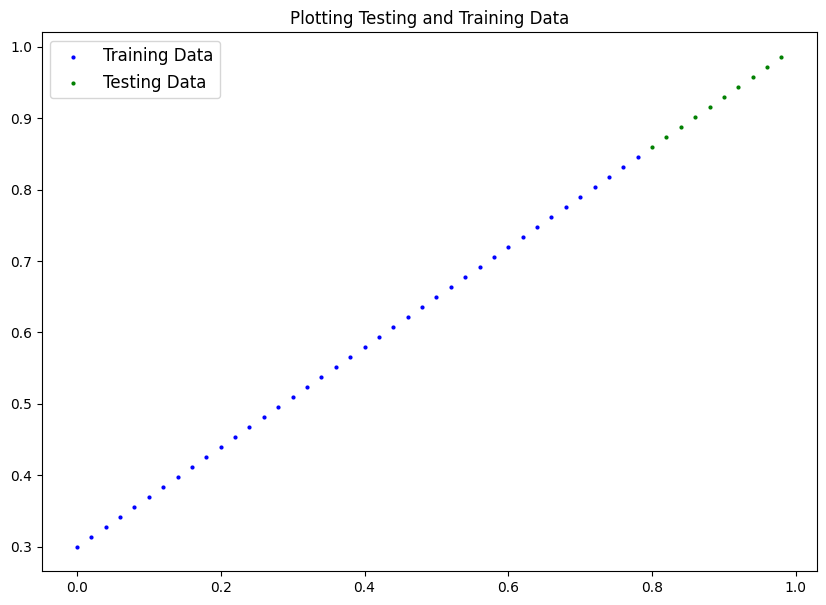

In [189]:
# Plot the data
plot_predictions(
  X_train,
  y_train,
  X_test,
  y_test,
  title="Plotting Testing and Training Data"
)

## 2. Building Model

In [190]:
# Create a Linear model by subclassing nn.Module
class LinearRegressionModelv2(nn.Module):
  def __init__(self):
    super().__init__()

    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(
        in_features = 1,
        out_features = 1
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# set manual seed for reproducibility
torch.manual_seed(42)
model_2 = LinearRegressionModelv2()
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

## 3. Train Model

In [191]:
# Set model to use target device
model_2.to(device)

# Check device
next(model_2.parameters()).device

device(type='cuda', index=0)

1. Loss fn
2. Optimizer
3. Training Loop
4. Testing Loop

In [192]:
# Setup loss function
loss_fn = nn.L1Loss()

#setup optimizer
optimizer = torch.optim.SGD(
    params = model_2.parameters(),
    lr=0.01
)

In [193]:
# Writing a Training and Testing loop
torch.manual_seed(42)

epochs = 300

# Put data on the target device

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_2.train()

  # Forward pass
  y_pred = model_2(X_train)

  # Calculate loss
  loss = loss_fn(y_pred, y_train)


  # Optimizer zero grad
  optimizer.zero_grad()

  # Perform backpropogation
  loss.backward()

  # Optimizer step
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Print out whats happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch}, Loss: {loss}, Test Loss: {test_loss}")
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

Epoch: 0, Loss: 0.5551779866218567, Test Loss: 0.5739762187004089
Epoch: 10, Loss: 0.439968079328537, Test Loss: 0.4392664134502411
Epoch: 20, Loss: 0.3247582018375397, Test Loss: 0.30455657839775085
Epoch: 30, Loss: 0.20954833924770355, Test Loss: 0.16984669864177704
Epoch: 40, Loss: 0.09433845430612564, Test Loss: 0.03513690456748009
Epoch: 50, Loss: 0.023886388167738914, Test Loss: 0.04784907028079033
Epoch: 60, Loss: 0.019956795498728752, Test Loss: 0.045803118497133255
Epoch: 70, Loss: 0.016517987474799156, Test Loss: 0.037530567497015
Epoch: 80, Loss: 0.013089174404740334, Test Loss: 0.02994490973651409
Epoch: 90, Loss: 0.009653178043663502, Test Loss: 0.02167237363755703
Epoch: 100, Loss: 0.006215683650225401, Test Loss: 0.014086711220443249
Epoch: 110, Loss: 0.00278724217787385, Test Loss: 0.005814164876937866
Epoch: 120, Loss: 0.0012645035749301314, Test Loss: 0.013801801018416882
Epoch: 130, Loss: 0.0012645035749301314, Test Loss: 0.013801801018416882
Epoch: 140, Loss: 0.0012

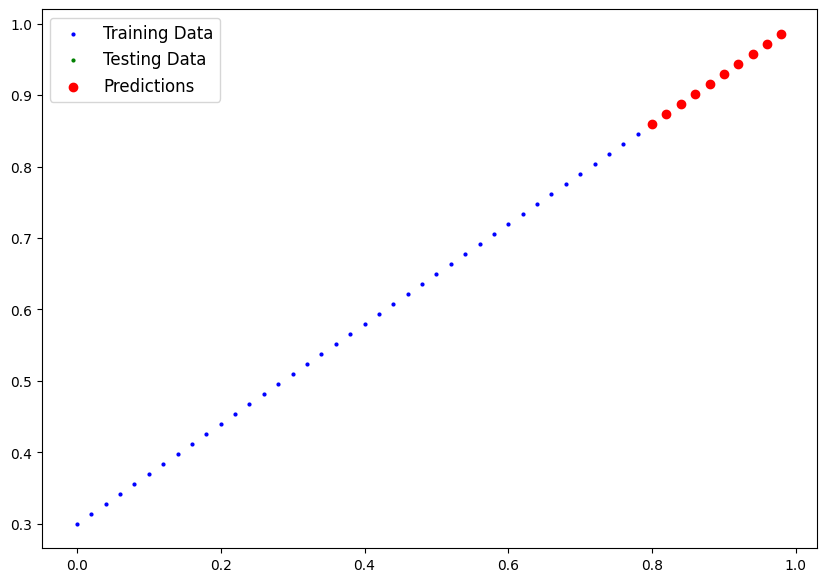

In [194]:
# Predicting and Plotting
with torch.inference_mode():
  y_preds_new = model_2(X_test)

plot_predictions(predictions=y_preds_new.cpu().numpy())

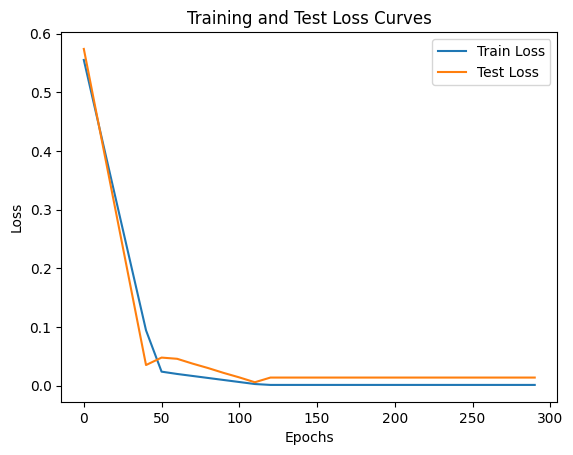

In [195]:
# Plotting the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label="Train Loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();